# 최종

In [34]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from data_augmentation import *
from model import *

from tensorflow import keras
from keras import layers


AUTOTUNE = tf.data.experimental.AUTOTUNE

In [35]:
div2k_data = tfds.image.Div2k(config="bicubic_x4",data_dir = "./image_dataset")
div2k_data.download_and_prepare()

# Taking train data from div2k_data object
train = div2k_data.as_dataset(split="train", as_supervised=True) # as_supervised: 데이터셋을 (입력, 레이블) 쌍으로 반환할지 여부를 결정. True이면 쌍으로, False이면 입력 데이터만 반환
train_cache = train.cache()
# Validation data
val = div2k_data.as_dataset(split="validation", as_supervised=True)
val_cache = val.cache()


데이터 증강(Flip, Rotate 등)

In [36]:
train_ds = dataset_object(train_cache, training=True)
val_ds = dataset_object(val_cache, training=False)

In [37]:
lowres, highres = next(iter(train_ds))

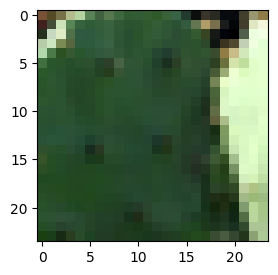

In [38]:
plt.figure(figsize=(3, 3))
plt.imshow(lowres[1]) # 저해상도 데이터셋

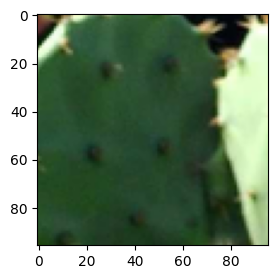

In [39]:
plt.figure(figsize=(3, 3))
plt.imshow(highres[1]) # 고해상도 데이터셋

In [40]:
model = edsr(num_filters=64, num_res_blocks=16)

In [42]:
optim_edsr = keras.optimizers.Adam(
    learning_rate=keras.optimizers.schedules.PiecewiseConstantDecay(
        boundaries=[5000], values=[1e-4, 5e-5]
    )
)
# Compiling model with loss as mean absolute error(L1 Loss) and metric as psnr
model.compile(optimizer=optim_edsr, loss="mae", metrics=[PSNR])
# Training for more epochs will improve results
model.fit(train_ds, epochs=100, steps_per_epoch=200, validation_data=val_ds)

Epoch 1/100


ValueError: in user code:

    File "c:\Users\Administrator\anaconda3\envs\SRGAN\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Administrator\anaconda3\envs\SRGAN\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Administrator\anaconda3\envs\SRGAN\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Administrator\anaconda3\envs\SRGAN\lib\site-packages\keras\engine\training.py", line 864, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "c:\Users\Administrator\anaconda3\envs\SRGAN\lib\site-packages\keras\engine\training.py", line 957, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "c:\Users\Administrator\anaconda3\envs\SRGAN\lib\site-packages\keras\engine\compile_utils.py", line 438, in update_state
        self.build(y_pred, y_true)
    File "c:\Users\Administrator\anaconda3\envs\SRGAN\lib\site-packages\keras\engine\compile_utils.py", line 358, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(y_pred, self._get_metric_objects,
    File "c:\Users\Administrator\anaconda3\envs\SRGAN\lib\site-packages\keras\engine\compile_utils.py", line 484, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "c:\Users\Administrator\anaconda3\envs\SRGAN\lib\site-packages\keras\engine\compile_utils.py", line 484, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "c:\Users\Administrator\anaconda3\envs\SRGAN\lib\site-packages\keras\engine\compile_utils.py", line 503, in _get_metric_object
        metric_obj = metrics_mod.get(metric)
    File "c:\Users\Administrator\anaconda3\envs\SRGAN\lib\site-packages\keras\metrics.py", line 4262, in get
        return deserialize(str(identifier))
    File "c:\Users\Administrator\anaconda3\envs\SRGAN\lib\site-packages\keras\metrics.py", line 4218, in deserialize
        return deserialize_keras_object(
    File "c:\Users\Administrator\anaconda3\envs\SRGAN\lib\site-packages\keras\utils\generic_utils.py", line 709, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown metric function: PSNR. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.
